In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
iris = pd.read_csv("iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
X = iris[['sepal_length','sepal_width','petal_length','petal_width']]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
U, s, VT = np.linalg.svd(X)

In [5]:
Sigma = np.zeros(X.shape)
Sigma[:X.shape[1],:X.shape[1]] = np.diag(s)
Sigma[0:5]

array([[95.95066751,  0.        ,  0.        ,  0.        ],
       [ 0.        , 17.72295328,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  3.46929666,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.87891236],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [6]:
n_componets = 2
Sigma = Sigma[:,:n_componets]
VT = VT[:n_componets, :]

In [7]:
T_s1 = U.dot(Sigma)

In [8]:
T_s1[0:5]

array([[-5.91220352,  2.30344211],
       [-5.57207573,  1.97383104],
       [-5.4464847 ,  2.09653267],
       [-5.43601924,  1.87168085],
       [-5.87506555,  2.32934799]])

In [9]:
T_s2 = X.dot(VT.T)

In [10]:
T_s2.columns = ["comp1", "comp2"]

In [11]:
T_s2["species"] = iris['species']
T_s2.head()

,comp1,comp2,species
0,-5.912204,2.303442,setosa
1,-5.572076,1.973831,setosa
2,-5.446485,2.096533,setosa
3,-5.436019,1.871681,setosa
4,-5.875066,2.329348,setosa


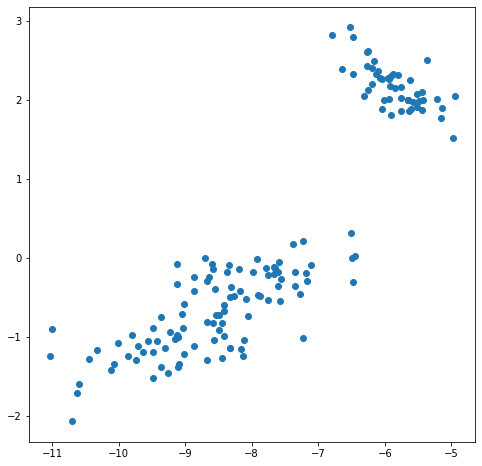

In [12]:
plt.figure(figsize=(8,8))
plt.scatter(T_s2["comp1"], T_s2["comp2"])
plt.show()

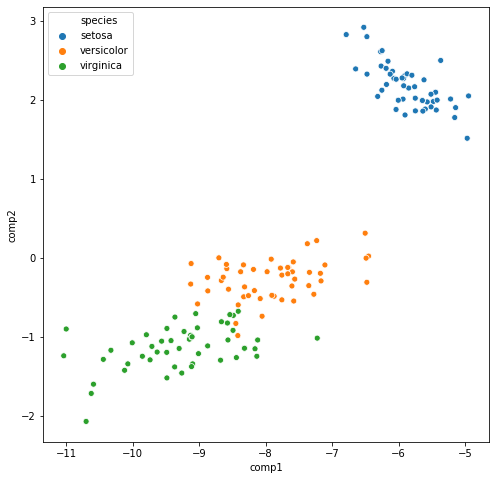

In [13]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="comp1", y="comp2",data=T_s2, hue="species")
plt.show()

In [14]:
#cau2
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import datasets
import numpy as np

In [15]:
digits = datasets.load_digits()
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [16]:
digits.data.shape

(1797, 64)

In [17]:
X = digits.data
# Make sparse matrix
X_sparse = csr_matrix(X)

In [18]:
tsvd = TruncatedSVD(n_components=10)

In [19]:
X_sparse_tsvd = tsvd.fit(X_sparse).transform(X_sparse)
#

In [20]:
print('Original number of features:', X_sparse.shape[1])
print('Reduced number of features:', X_sparse_tsvd.shape[1])

Original number of features: 64
Reduced number of features: 10


In [21]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [26]:
X_sparse_tsvd[0]

array([45.86127719, -1.19211582, 21.10005873, -9.4889708 , 13.04313341,
       -7.01656909, -8.95992516,  0.39565834,  1.31026449, -1.39383223])

In [24]:
tsvd.explained_variance_ratio_[0:10].sum()

0.7324264326757722

TruncatedSVD(algorithm='randomized', n_components=10, n_iter=5,
             random_state=None, tol=0.0)

In [28]:
X_sparse_tsvd.shape


(1797, 10)